## 阶跃函数的实现

In [2]:
def step_function(x):
    if x>0:
        return 1
    else:
        return 0
    
def step_function_numpy(x):#改为numpy实现的阶跃函数
    y=x>0
    return y.astype(np.int)#将bool型改为numpy类型

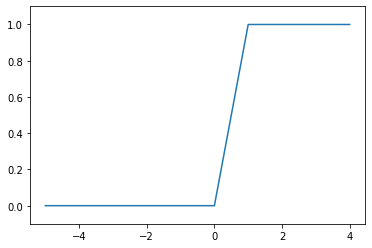

In [6]:
import numpy as np
import matplotlib.pylab as plt

def step_function(x):
    return np.array(x>0,dtype=np.int)
x=np.arange(-5.0,5.0,1.0)
y=step_function(x)
plt.plot(x,y)
plt.ylim(-0.1,1.1)#指定y的范围
plt.show()

In [7]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

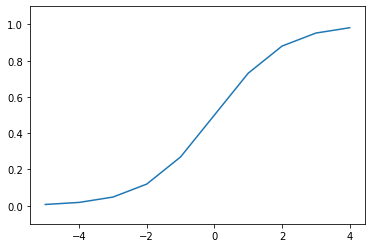

In [8]:
x=np.arange(-5.0,5.0,1.0)
y=sigmoid(x)
plt.plot(x,y)
plt.ylim(-0.1,1.1)#指定y的范围
plt.show()

### 小结：神经网络的激活函数使用非线性函数，为了发挥叠加层的优势。

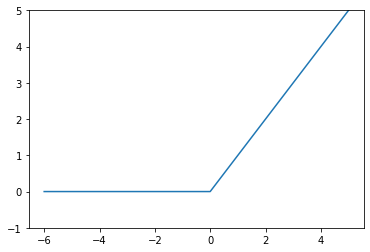

In [10]:
def relu(x):
    return np.maximum(0,x)
x=np.arange(-6,6,1)
y=relu(x)
plt.plot(x,y)
plt.ylim(-1,5)
plt.show()

## 3层神经网络实现，使用Numpy数组高效实现。

In [17]:
def init_network():
    network={}#network作为字典。
    network['W1']=np.array([[0.1,0.3,0.5],[0.2,0.4,0.6]])
    network['b1']=np.array([0.1,0.2,0.3])
    network['W2']=np.array([[0.1,0.4],[0.2,0.5],[0.3,0.6]])
    network['b2']=np.array([0.1,0.2])
    network['W3']=np.array([[0.1,0.3],[0.2,0.4]])
    network['b3']=np.array([0.1,0.2])
    return network

def identity_function(x):
    return x
       
def forward(network,x):
    W1,W2,W3=network['W1'],network['W2'],network['W3']
    b1,b2,b3=network['b1'],network['b2'],network['b3']
    a1=np.dot(x,W1)+b1
    z1=sigmoid(a1)
    a2=np.dot(z1,W2)+b2
    z2=sigmoid(a2)
    a3=np.dot(z2,W3)+b3
    z3=sigmoid(a3)
    y=identity_function(a3)
    return y

network=init_network()
x=np.array([1,5])
y=forward(network,x)
print(y)

[0.33098211 0.72778046]


In [13]:
def softmax(a):
    c=np.max(a)
    exp_a=np.exp(a-c)
    sum_exp_a=np.sum(exp_a)
    y=exp_a/sum_exp_a
    return y

### 小结：通过减去输入信号中的最大值，避免溢出问题。